In [26]:
# 載入套件 torch 相關套件
import os
import cv2
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from model import U2NET
from torch.utils.data import Dataset, DataLoader

from modules.dataset import RescaleT
from modules.dataset import ToTensorLab
from modules.dataset import CustomDataset

In [27]:
def min_max_normalize(array):
    max_val = np.max(array)
    min_val = np.min(array)

    normalized = (array - min_val) / (max_val - min_val)

    return normalized

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = U2NET(in_ch=3, out_ch=1)
# 載入模型權重檔
model.load_state_dict(torch.load('model/weight/u2net_rice_panicle_image_extract.pth'))
# 將模型設定為評估模式
model.eval()
model = model.to(device)

cuda


(3840, 2160, 3)


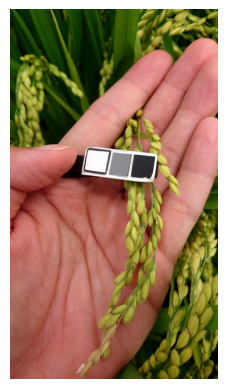

In [29]:
# 載入圖片
img_path = 'images/20230523101646.jpg'
img = Image.open(img_path)

rgb_img = np.array(img)
print(rgb_img.shape)

origin_h, origin_w = rgb_img.shape[:2]

# 顯示圖片
plt.imshow(img)
plt.axis('off')
plt.show()

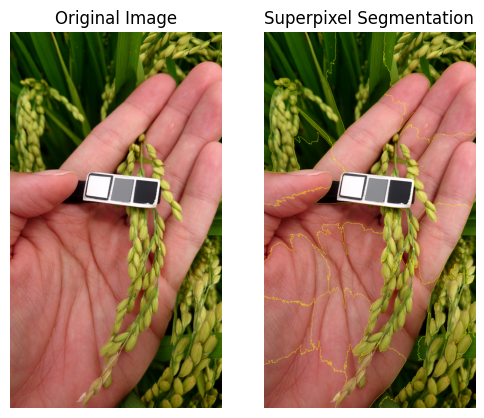

In [30]:
from lime import lime_image
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.segmentation import slic, mark_boundaries

# 超像素分割
n_segments = 25
segments = slic(rgb_img, n_segments=n_segments, compactness=20)

fig, ax = plt.subplots(1, 2, figsize=(6, 6))
ax[0].imshow(rgb_img)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(mark_boundaries(rgb_img, segments))
ax[1].axis('off')
ax[1].set_title('Superpixel Segmentation')
plt.show()

In [31]:
def multi_mask_image(image, segments, mask_num, output_num, mask_color=(0, 0, 0)):
    """
    隨機遮罩超像素，並輸出多張遮罩後的圖片
    參數：
        image: 原始圖像，形狀為 (H, W, C)
        segments: 超像素分割結果，形狀為 (H, W)，每個位置的數值代表所屬的超像素標籤
        mask_num: 每張圖片欲遮罩的超像素數量
        output_num: 輸出圖片的數量
        mask_color: 遮罩區域的顏色，預設為黑色 (0, 0, 0)
    返回：
        masked_images: 經過遮罩處理後的圖片 list
    """
    masked_images = []
    unique_segments = np.unique(segments)

    # 若要求遮罩數量超過實際超像素數量，則取所有超像素
    mask_num = min(mask_num, len(unique_segments))

    for i in range(output_num):
        # 為每一張圖片都拷貝一份原圖
        masked_img = image.copy()

        # 隨機選取要遮罩的超像素標籤
        mask_segments = random.sample(list(unique_segments), mask_num)

        # 建立遮罩，將屬於選取超像素的區域設為 True
        mask = np.isin(segments, mask_segments)

        # 將遮罩區域的像素改為 mask_color
        masked_img[mask] = mask_color

        masked_images.append(masked_img)

        masked_bgr = cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'xai_results/masks/masked_{i+1}.png', masked_bgr)
    return np.array(masked_images)


# 範例用法
masked_result = multi_mask_image(
    image=rgb_img, segments=segments, mask_num=5, output_num=100)

In [32]:
image_paths = [f'xai_results/masks/{image_name}' for image_name in os.listdir('xai_results/masks')]

In [33]:
test_salobj_dataset = CustomDataset(
    img_name_list=image_paths,
    lbl_name_list=[],
    transform=transforms.Compose([RescaleT(256), ToTensorLab(flag=0)])
)

test_dataloader = DataLoader(
    test_salobj_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=1
)

稻穗去背中...
稻穗影像去背處理中: xai_results/masks/masked_1.png 1 / 100
(3840, 2160)


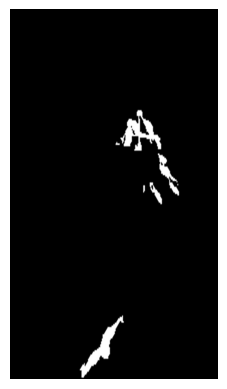

稻穗影像去背處理中: xai_results/masks/masked_2.png 2 / 100
(3840, 2160)


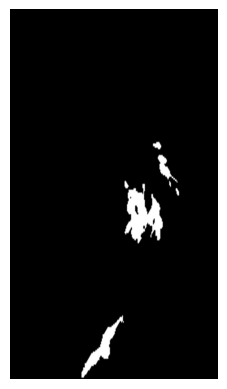

稻穗影像去背處理中: xai_results/masks/masked_3.png 3 / 100
(3840, 2160)


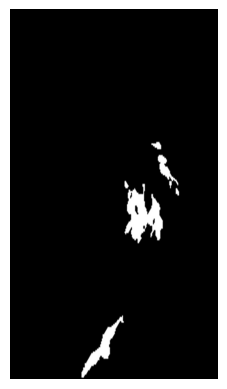

稻穗影像去背處理中: xai_results/masks/masked_4.png 4 / 100
(3840, 2160)


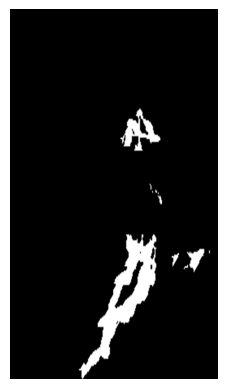

稻穗影像去背處理中: xai_results/masks/masked_5.png 5 / 100
(3840, 2160)


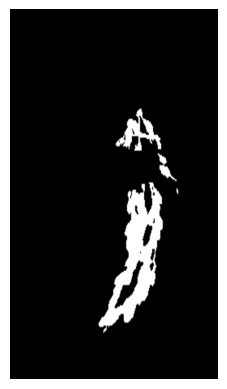

稻穗影像去背處理中: xai_results/masks/masked_6.png 6 / 100
(3840, 2160)


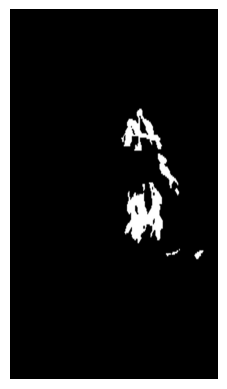

稻穗影像去背處理中: xai_results/masks/masked_7.png 7 / 100
(3840, 2160)


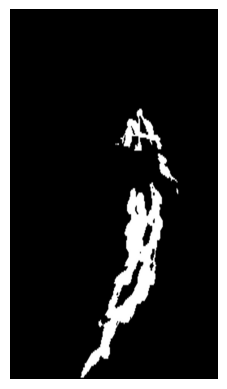

稻穗影像去背處理中: xai_results/masks/masked_8.png 8 / 100
(3840, 2160)


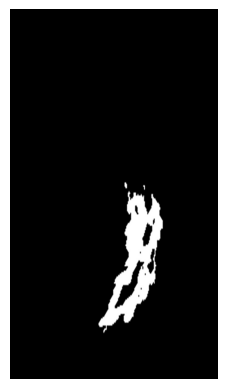

稻穗影像去背處理中: xai_results/masks/masked_9.png 9 / 100
(3840, 2160)


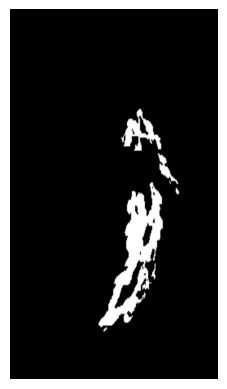

稻穗影像去背處理中: xai_results/masks/masked_10.png 10 / 100
(3840, 2160)


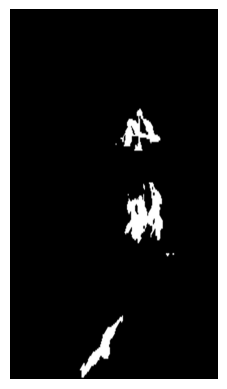

稻穗影像去背處理中: xai_results/masks/masked_11.png 11 / 100
(3840, 2160)


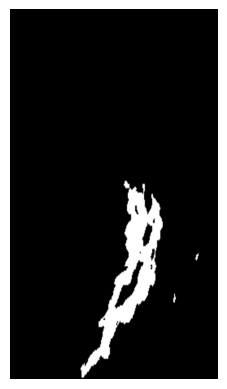

稻穗影像去背處理中: xai_results/masks/masked_12.png 12 / 100
(3840, 2160)


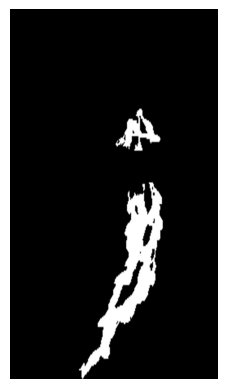

稻穗影像去背處理中: xai_results/masks/masked_13.png 13 / 100
(3840, 2160)


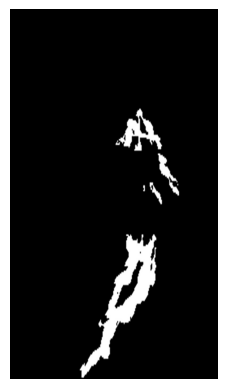

稻穗影像去背處理中: xai_results/masks/masked_14.png 14 / 100
(3840, 2160)


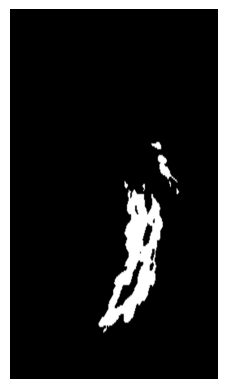

稻穗影像去背處理中: xai_results/masks/masked_15.png 15 / 100
(3840, 2160)


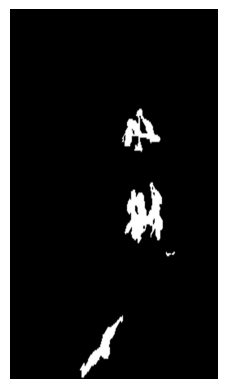

稻穗影像去背處理中: xai_results/masks/masked_16.png 16 / 100
(3840, 2160)


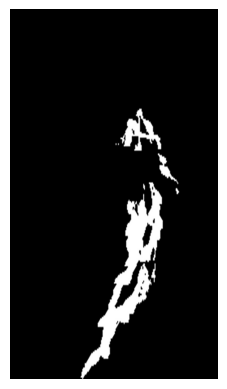

稻穗影像去背處理中: xai_results/masks/masked_17.png 17 / 100
(3840, 2160)


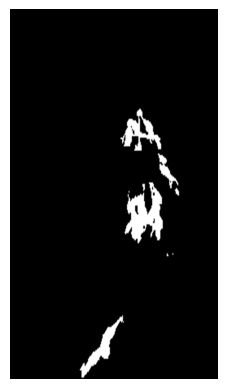

稻穗影像去背處理中: xai_results/masks/masked_18.png 18 / 100
(3840, 2160)


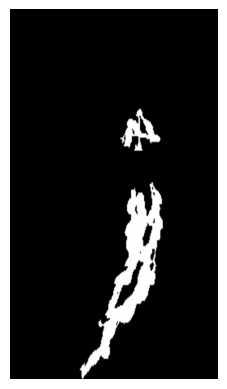

稻穗影像去背處理中: xai_results/masks/masked_19.png 19 / 100
(3840, 2160)


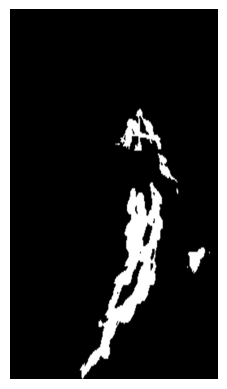

稻穗影像去背處理中: xai_results/masks/masked_20.png 20 / 100
(3840, 2160)


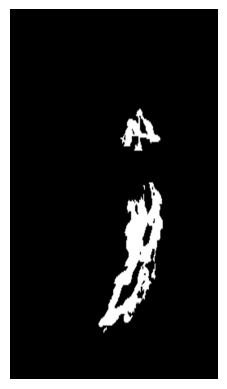

稻穗影像去背處理中: xai_results/masks/masked_21.png 21 / 100
(3840, 2160)


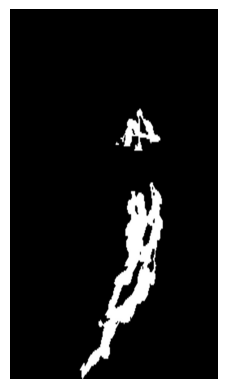

稻穗影像去背處理中: xai_results/masks/masked_22.png 22 / 100
(3840, 2160)


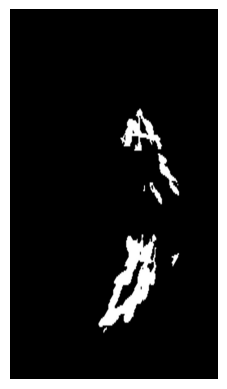

稻穗影像去背處理中: xai_results/masks/masked_23.png 23 / 100
(3840, 2160)


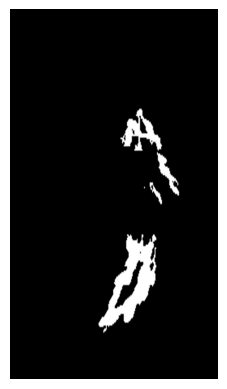

稻穗影像去背處理中: xai_results/masks/masked_24.png 24 / 100
(3840, 2160)


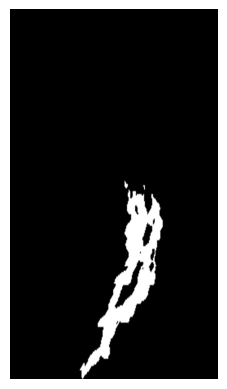

稻穗影像去背處理中: xai_results/masks/masked_25.png 25 / 100
(3840, 2160)


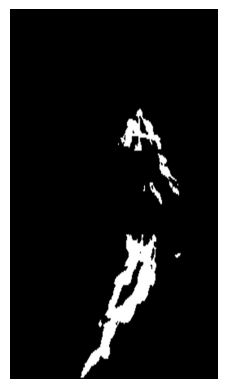

稻穗影像去背處理中: xai_results/masks/masked_26.png 26 / 100
(3840, 2160)


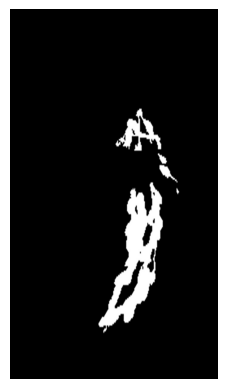

稻穗影像去背處理中: xai_results/masks/masked_27.png 27 / 100
(3840, 2160)


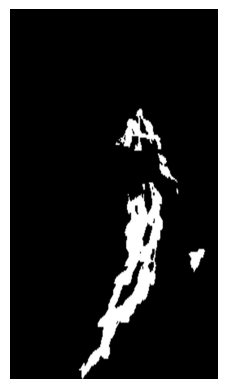

稻穗影像去背處理中: xai_results/masks/masked_28.png 28 / 100
(3840, 2160)


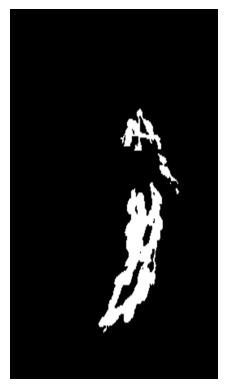

稻穗影像去背處理中: xai_results/masks/masked_29.png 29 / 100
(3840, 2160)


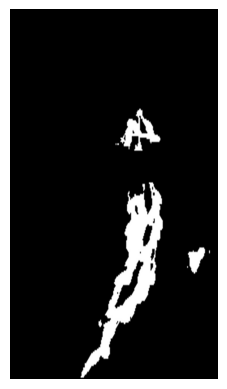

稻穗影像去背處理中: xai_results/masks/masked_30.png 30 / 100
(3840, 2160)


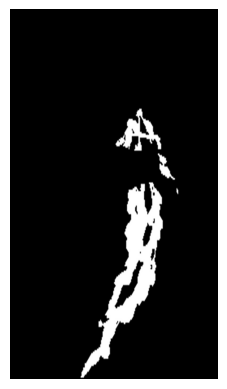

稻穗影像去背處理中: xai_results/masks/masked_31.png 31 / 100
(3840, 2160)


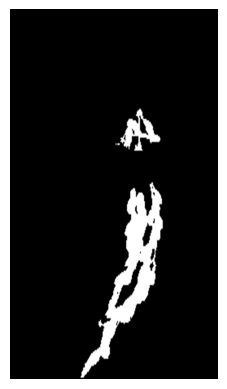

稻穗影像去背處理中: xai_results/masks/masked_32.png 32 / 100
(3840, 2160)


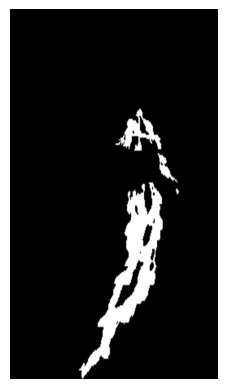

稻穗影像去背處理中: xai_results/masks/masked_33.png 33 / 100
(3840, 2160)


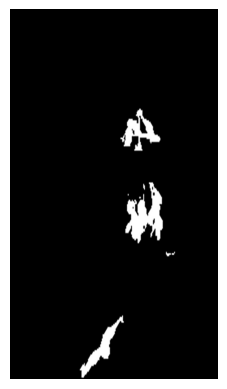

稻穗影像去背處理中: xai_results/masks/masked_34.png 34 / 100
(3840, 2160)


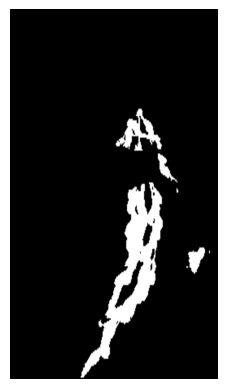

稻穗影像去背處理中: xai_results/masks/masked_35.png 35 / 100
(3840, 2160)


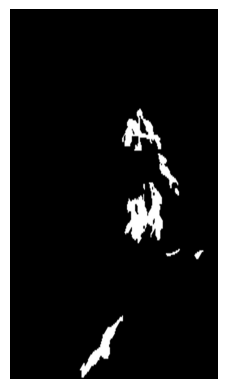

稻穗影像去背處理中: xai_results/masks/masked_36.png 36 / 100
(3840, 2160)


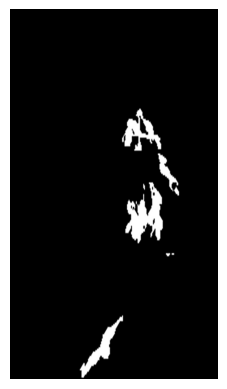

稻穗影像去背處理中: xai_results/masks/masked_37.png 37 / 100
(3840, 2160)


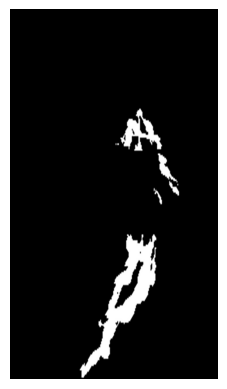

稻穗影像去背處理中: xai_results/masks/masked_38.png 38 / 100
(3840, 2160)


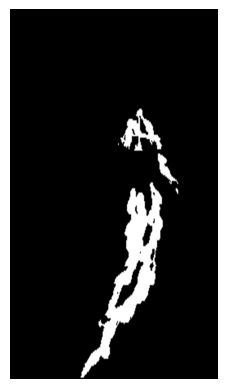

稻穗影像去背處理中: xai_results/masks/masked_39.png 39 / 100
(3840, 2160)


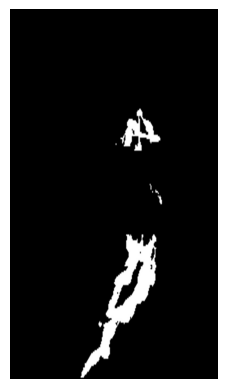

稻穗影像去背處理中: xai_results/masks/masked_40.png 40 / 100
(3840, 2160)


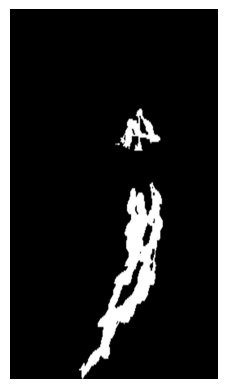

稻穗影像去背處理中: xai_results/masks/masked_41.png 41 / 100
(3840, 2160)


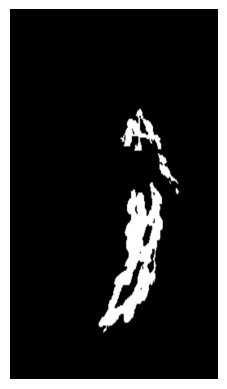

稻穗影像去背處理中: xai_results/masks/masked_42.png 42 / 100
(3840, 2160)


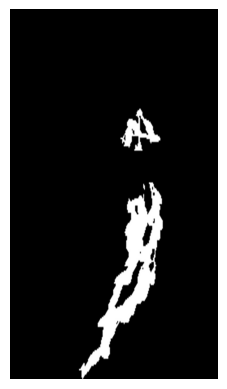

稻穗影像去背處理中: xai_results/masks/masked_43.png 43 / 100
(3840, 2160)


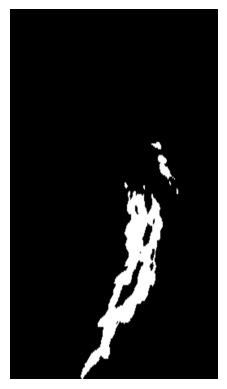

稻穗影像去背處理中: xai_results/masks/masked_44.png 44 / 100
(3840, 2160)


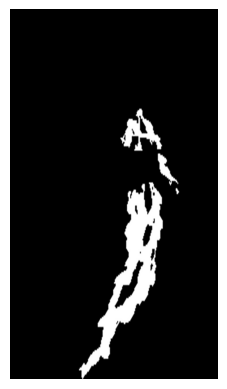

稻穗影像去背處理中: xai_results/masks/masked_45.png 45 / 100
(3840, 2160)


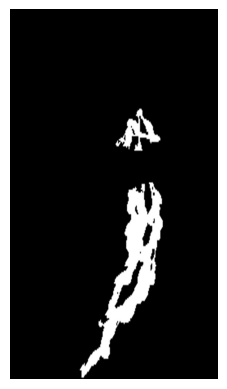

稻穗影像去背處理中: xai_results/masks/masked_46.png 46 / 100
(3840, 2160)


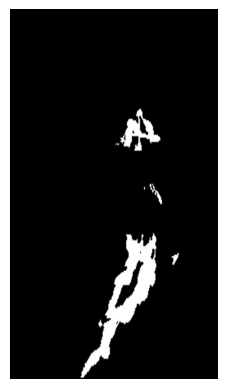

稻穗影像去背處理中: xai_results/masks/masked_47.png 47 / 100
(3840, 2160)


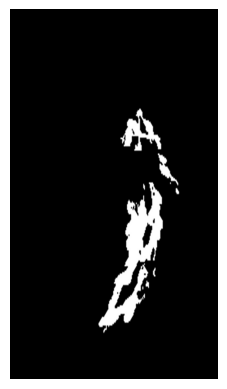

稻穗影像去背處理中: xai_results/masks/masked_48.png 48 / 100
(3840, 2160)


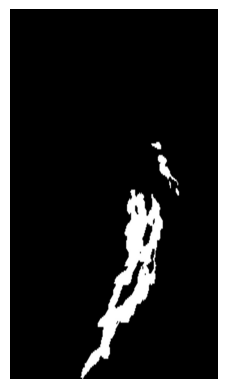

稻穗影像去背處理中: xai_results/masks/masked_49.png 49 / 100
(3840, 2160)


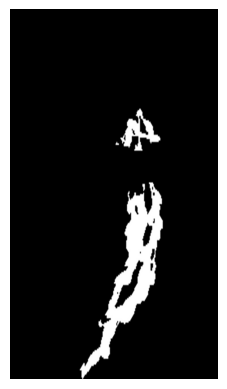

稻穗影像去背處理中: xai_results/masks/masked_50.png 50 / 100
(3840, 2160)


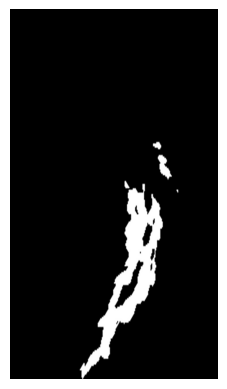

稻穗影像去背處理中: xai_results/masks/masked_51.png 51 / 100
(3840, 2160)


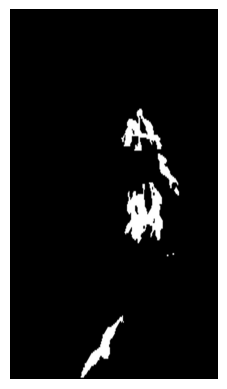

稻穗影像去背處理中: xai_results/masks/masked_52.png 52 / 100
(3840, 2160)


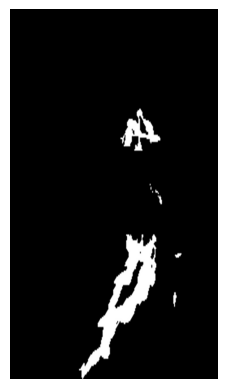

稻穗影像去背處理中: xai_results/masks/masked_53.png 53 / 100
(3840, 2160)


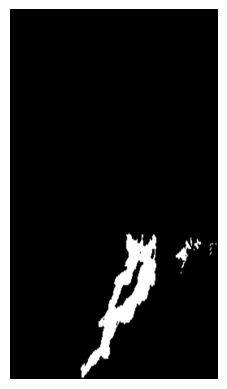

稻穗影像去背處理中: xai_results/masks/masked_54.png 54 / 100
(3840, 2160)


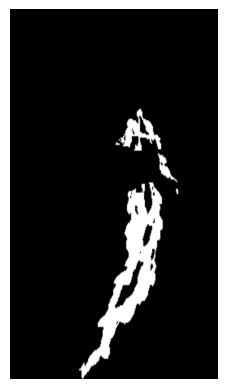

稻穗影像去背處理中: xai_results/masks/masked_55.png 55 / 100
(3840, 2160)


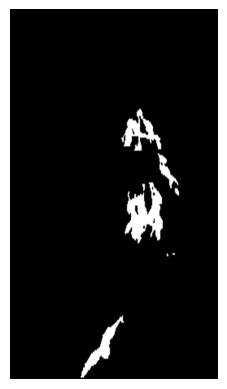

稻穗影像去背處理中: xai_results/masks/masked_56.png 56 / 100
(3840, 2160)


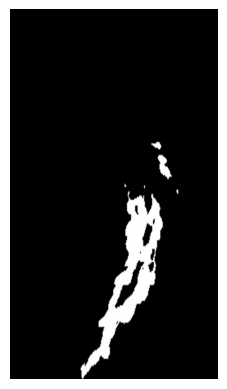

稻穗影像去背處理中: xai_results/masks/masked_57.png 57 / 100
(3840, 2160)


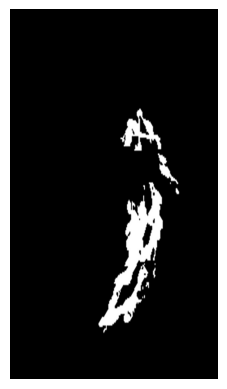

稻穗影像去背處理中: xai_results/masks/masked_58.png 58 / 100
(3840, 2160)


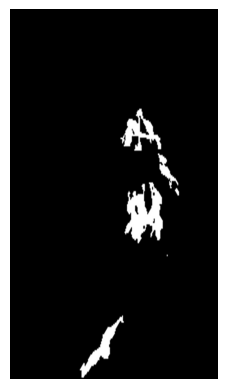

稻穗影像去背處理中: xai_results/masks/masked_59.png 59 / 100
(3840, 2160)


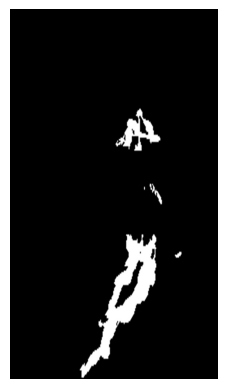

稻穗影像去背處理中: xai_results/masks/masked_60.png 60 / 100
(3840, 2160)


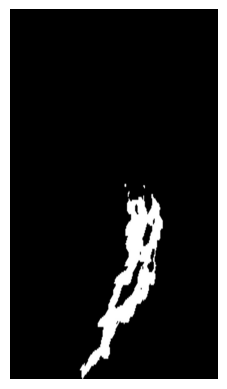

稻穗影像去背處理中: xai_results/masks/masked_61.png 61 / 100
(3840, 2160)


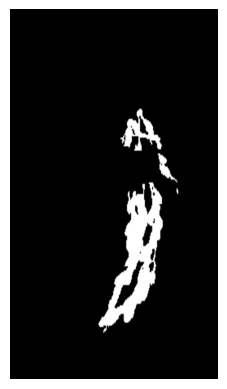

稻穗影像去背處理中: xai_results/masks/masked_62.png 62 / 100
(3840, 2160)


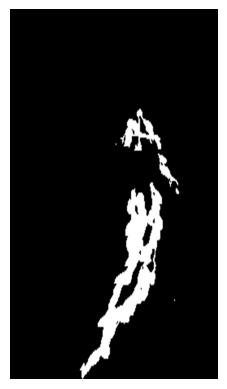

稻穗影像去背處理中: xai_results/masks/masked_63.png 63 / 100
(3840, 2160)


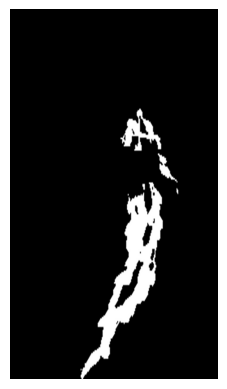

稻穗影像去背處理中: xai_results/masks/masked_64.png 64 / 100
(3840, 2160)


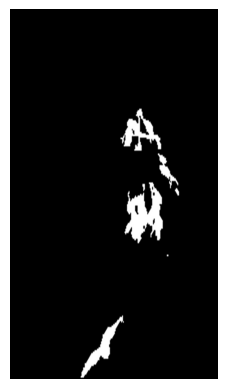

稻穗影像去背處理中: xai_results/masks/masked_65.png 65 / 100
(3840, 2160)


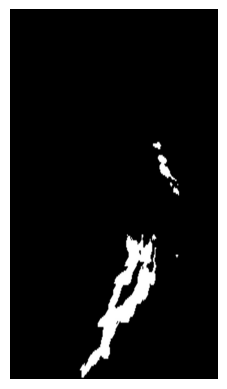

稻穗影像去背處理中: xai_results/masks/masked_66.png 66 / 100
(3840, 2160)


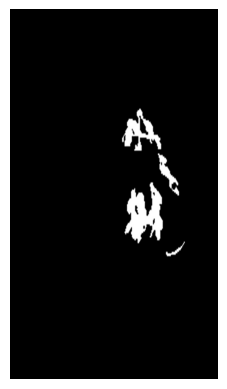

稻穗影像去背處理中: xai_results/masks/masked_67.png 67 / 100
(3840, 2160)


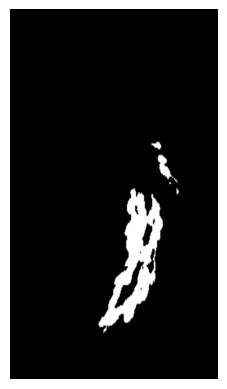

稻穗影像去背處理中: xai_results/masks/masked_68.png 68 / 100
(3840, 2160)


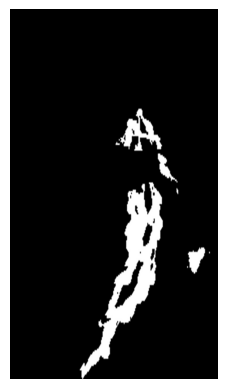

稻穗影像去背處理中: xai_results/masks/masked_69.png 69 / 100
(3840, 2160)


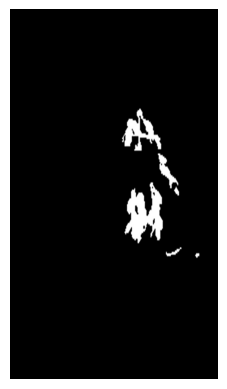

稻穗影像去背處理中: xai_results/masks/masked_70.png 70 / 100
(3840, 2160)


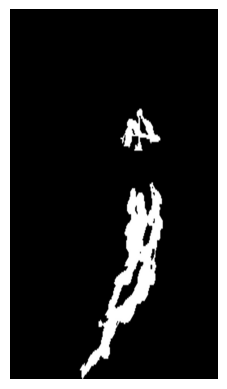

稻穗影像去背處理中: xai_results/masks/masked_71.png 71 / 100
(3840, 2160)


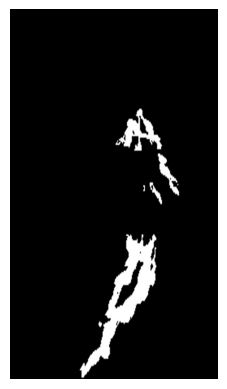

稻穗影像去背處理中: xai_results/masks/masked_72.png 72 / 100
(3840, 2160)


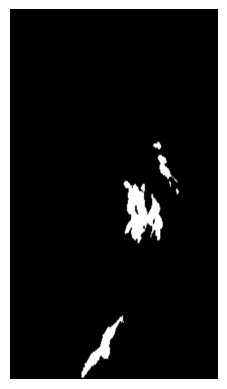

稻穗影像去背處理中: xai_results/masks/masked_73.png 73 / 100
(3840, 2160)


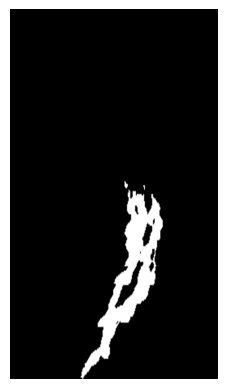

稻穗影像去背處理中: xai_results/masks/masked_74.png 74 / 100
(3840, 2160)


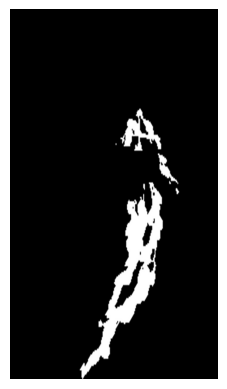

稻穗影像去背處理中: xai_results/masks/masked_75.png 75 / 100
(3840, 2160)


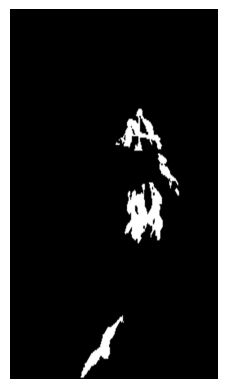

稻穗影像去背處理中: xai_results/masks/masked_76.png 76 / 100
(3840, 2160)


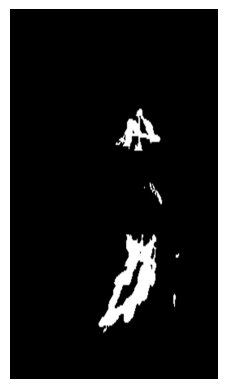

稻穗影像去背處理中: xai_results/masks/masked_77.png 77 / 100
(3840, 2160)


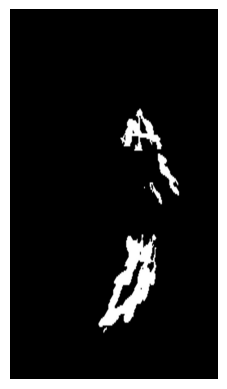

稻穗影像去背處理中: xai_results/masks/masked_78.png 78 / 100
(3840, 2160)


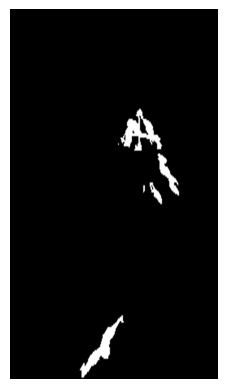

稻穗影像去背處理中: xai_results/masks/masked_79.png 79 / 100
(3840, 2160)


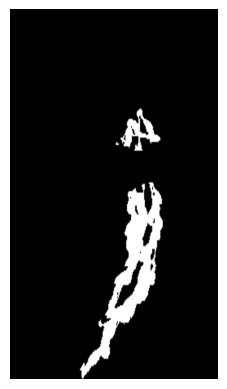

稻穗影像去背處理中: xai_results/masks/masked_80.png 80 / 100
(3840, 2160)


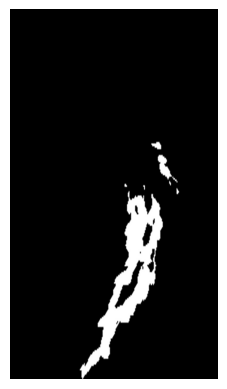

稻穗影像去背處理中: xai_results/masks/masked_81.png 81 / 100
(3840, 2160)


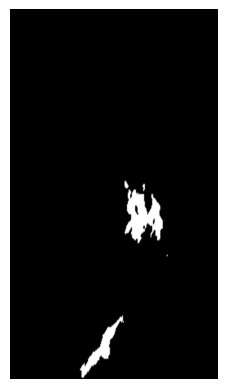

稻穗影像去背處理中: xai_results/masks/masked_82.png 82 / 100
(3840, 2160)


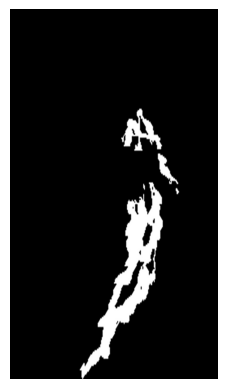

稻穗影像去背處理中: xai_results/masks/masked_83.png 83 / 100
(3840, 2160)


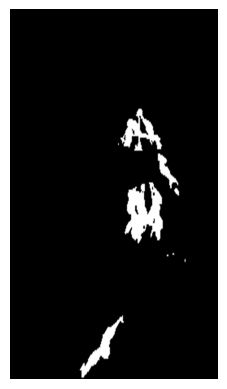

稻穗影像去背處理中: xai_results/masks/masked_84.png 84 / 100
(3840, 2160)


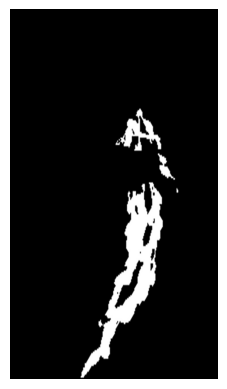

稻穗影像去背處理中: xai_results/masks/masked_85.png 85 / 100
(3840, 2160)


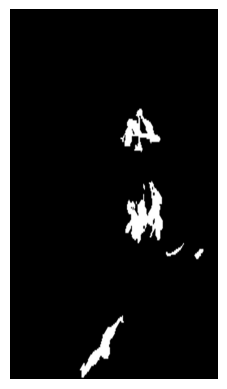

稻穗影像去背處理中: xai_results/masks/masked_86.png 86 / 100
(3840, 2160)


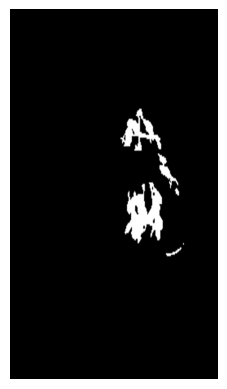

稻穗影像去背處理中: xai_results/masks/masked_87.png 87 / 100
(3840, 2160)


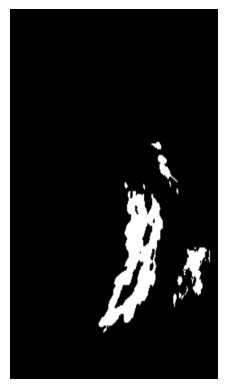

稻穗影像去背處理中: xai_results/masks/masked_88.png 88 / 100
(3840, 2160)


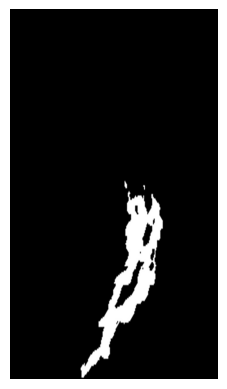

稻穗影像去背處理中: xai_results/masks/masked_89.png 89 / 100
(3840, 2160)


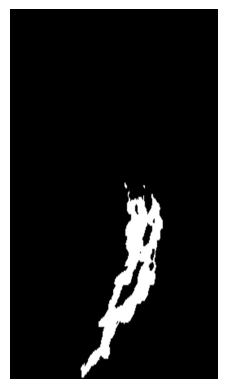

稻穗影像去背處理中: xai_results/masks/masked_90.png 90 / 100
(3840, 2160)


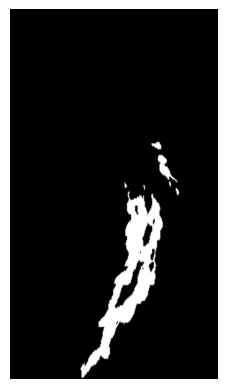

稻穗影像去背處理中: xai_results/masks/masked_91.png 91 / 100
(3840, 2160)


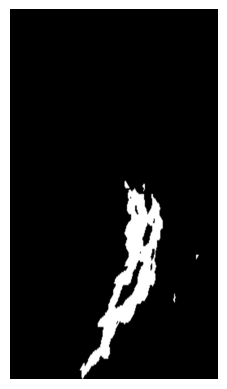

稻穗影像去背處理中: xai_results/masks/masked_92.png 92 / 100
(3840, 2160)


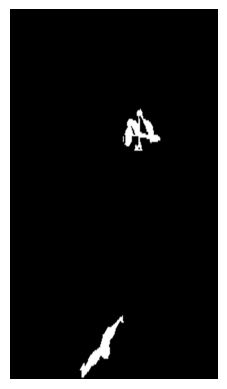

稻穗影像去背處理中: xai_results/masks/masked_93.png 93 / 100
(3840, 2160)


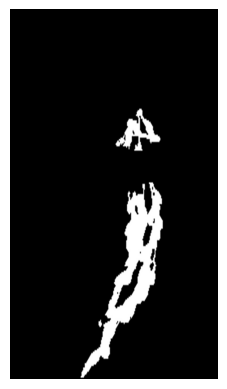

稻穗影像去背處理中: xai_results/masks/masked_94.png 94 / 100
(3840, 2160)


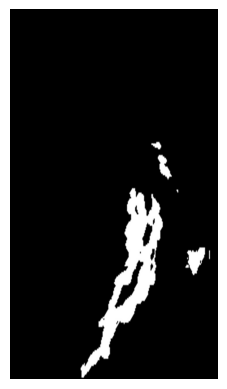

稻穗影像去背處理中: xai_results/masks/masked_95.png 95 / 100
(3840, 2160)


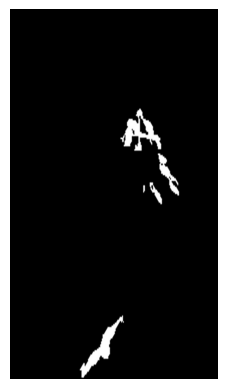

稻穗影像去背處理中: xai_results/masks/masked_96.png 96 / 100
(3840, 2160)


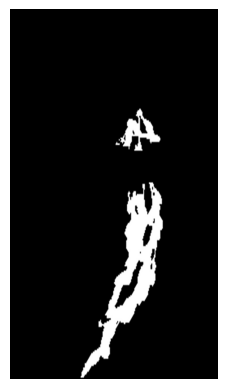

稻穗影像去背處理中: xai_results/masks/masked_97.png 97 / 100
(3840, 2160)


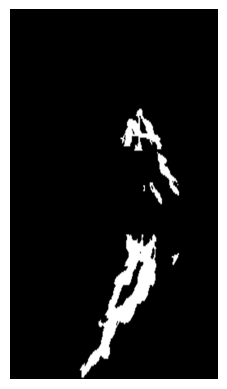

稻穗影像去背處理中: xai_results/masks/masked_98.png 98 / 100
(3840, 2160)


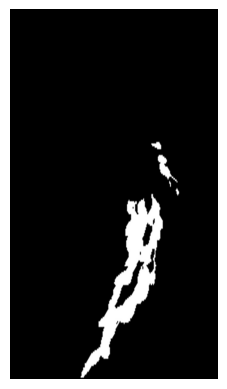

稻穗影像去背處理中: xai_results/masks/masked_99.png 99 / 100
(3840, 2160)


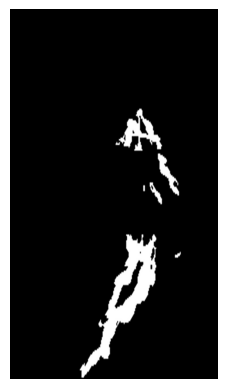

稻穗影像去背處理中: xai_results/masks/masked_100.png 100 / 100
(3840, 2160)


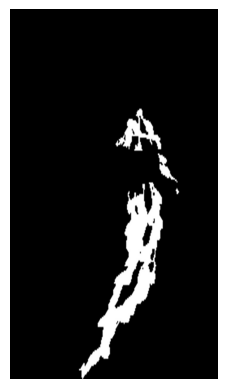

In [34]:
print('稻穗去背中...')
for i, data in enumerate(test_dataloader):
    print("稻穗影像去背處理中:", image_paths[i], f'{i + 1} / {len(test_dataloader)}')

    inputs_test = data['image']
    inputs_test = inputs_test.type(torch.FloatTensor)

    inputs_test = inputs_test.to(device)

    d1, d2, d3, d4, d5, d6, d7 = model(inputs_test)

    # print(d1.size())
    # print(d1.squeeze().size())
    
    # print(d2.size())
    # print(d2.squeeze().size())
    
    # print(d3.size())
    # print(d3.squeeze().size())
    
    # print(d4.size())
    # print(d4.squeeze().size())
    
    # print(d5.size())
    # print(d5.squeeze().size())
    
    # print(d6.size())
    # print(d6.squeeze().size())
    
    # print(d7.size())
    # print(d7.squeeze().size())

    # Normalization
    pred = d1.squeeze().cpu().detach().numpy()
    pred = min_max_normalize(pred)

    # Save prediction
    binary_result = (pred > 0.5).astype(np.uint8)  # 轉換為 0 和 1
    binary_result = binary_result * 255  # 轉換為 0 和 255
    mask = cv2.resize(binary_result, (origin_w, origin_h), interpolation=cv2.INTER_CUBIC)
    print(mask.shape)

    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()
    
    output_path = f'xai_results/predictions/predictions_{i+1}.png'
    cv2.imwrite(output_path, mask)


In [35]:
prediction_paths = [f'xai_results/predictions/{prediction_name}' for prediction_name in os.listdir('xai_results/predictions')]

predictions = []
for prediction_path in prediction_paths:
    prediction = cv2.imread(prediction_path, cv2.IMREAD_GRAYSCALE)
    predictions.append(prediction)

predictions = np.array(predictions)
print(predictions.shape)

(100, 3840, 2160)


In [36]:
binary_masks = (predictions > 0).astype(np.uint8)

In [37]:
pixel_counts = np.sum(binary_masks, axis=0)
np.unique(pixel_counts)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97], dtype=uint64)

In [38]:
threshold = 0.7
pixel_threshold = int(binary_masks.shape[0] * threshold)

In [39]:
# 像素點超過60%的mask數量就保留，否則設為0
final_mask = (pixel_threshold <= np.sum(binary_masks, axis=0)).astype(np.uint8) * 255
print(final_mask.shape)

(3840, 2160)


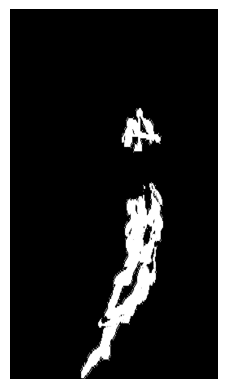

True

In [40]:
plt.imshow(final_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('xai_results/final_mask.png', final_mask)

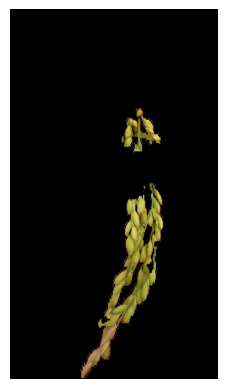

True

In [41]:
segmentation = (rgb_img * (final_mask[..., None] / 255)).astype(np.uint8)
plt.imshow(segmentation)
plt.axis('off')
plt.show()
cv2.imwrite('xai_results/feature_important.png', cv2.cvtColor(segmentation, cv2.COLOR_RGB2BGR))